In [1]:
import io
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.colab import files
uploaded = files.upload()
iris = pd.read_csv(io.BytesIO(uploaded['iris.csv']))

Saving iris.csv to iris.csv


In [2]:
# Let's see what's in the iris data
iris.head(20)

,id,SepalLengthCM,SepalWidthCM,PetalLengthCM,PetalWidthCM,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
iris.describe()

,id,SepalLengthCM,SepalWidthCM,PetalLengthCM,PetalWidthCM
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
# Show the total number of records for each Class
print(iris.groupby('Class').size())

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Stratified sample data

In [5]:
def stratifySampleDataset(df,feature,nSample):
  stratifiedDF = df.groupby(feature).apply(lambda x: x.sample(frac = nSample))
  stratifiedDF.index = stratifiedDF.index.droplevel(0)
  return stratifiedDF

In [6]:
stratTrainDataset = stratifySampleDataset(iris,'Class',0.7)
stratTestDataset = stratifySampleDataset(iris,'Class',0.3)

In [7]:
stratTrainDataset.describe()

,id,SepalLengthCM,SepalWidthCM,PetalLengthCM,PetalWidthCM
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,76.123810,5.895238,3.077143,3.807619,1.209524
std,42.841545,0.855455,0.430397,1.800037,0.767303
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,41.000000,5.100000,2.800000,1.500000,0.300000
50%,76.000000,5.800000,3.000000,4.400000,1.300000
75%,111.000000,6.500000,3.400000,5.200000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
stratTestDataset.describe()

,id,SepalLengthCM,SepalWidthCM,PetalLengthCM,PetalWidthCM
count,45.000000,45.000000,45.000000,45.000000,45.000000
mean,75.244444,5.782222,3.057778,3.744444,1.184444
std,43.276151,0.829372,0.452513,1.751565,0.747102
min,1.000000,4.300000,2.000000,1.100000,0.100000
25%,44.000000,5.100000,2.800000,1.600000,0.300000
50%,75.000000,5.700000,3.000000,4.400000,1.300000
75%,108.000000,6.400000,3.200000,5.100000,1.800000
max,150.000000,7.700000,4.000000,6.300000,2.500000


In [9]:
stratTrainDataset.head(105)

,id,SepalLengthCM,SepalWidthCM,PetalLengthCM,PetalWidthCM,Class
22,23,4.6,3.6,1.0,0.2,Iris-setosa
12,13,4.8,3.0,1.4,0.1,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa
46,47,5.1,3.8,1.6,0.2,Iris-setosa
31,32,5.4,3.4,1.5,0.4,Iris-setosa
...,...,...,...,...,...,...
139,140,6.9,3.1,5.4,2.1,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica


In [10]:
# Show the total number of records for each Class
print(stratTrainDataset.groupby('Class').size())

Class
Iris-setosa        35
Iris-versicolor    35
Iris-virginica     35
dtype: int64


In [11]:
print(stratTestDataset.groupby('Class').size())

Class
Iris-setosa        15
Iris-versicolor    15
Iris-virginica     15
dtype: int64


In [12]:
#import preprocessing libraries
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
# import the train_test_split from model_selection
from sklearn.model_selection import train_test_split

In [14]:
#import pyplot for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

<Axes: >

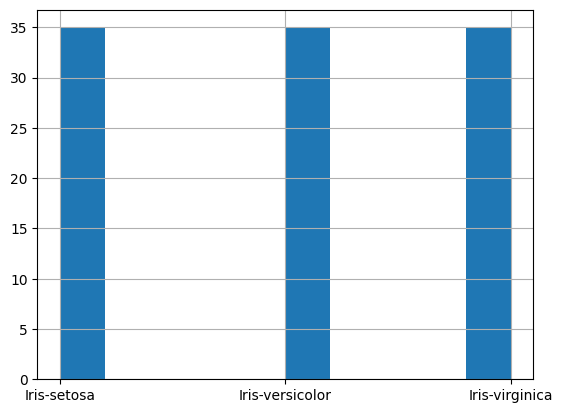

In [15]:
stratTrainDataset['Class'].hist()

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'SepalLengthCM'}>],
       [<Axes: title={'center': 'SepalWidthCM'}>,
        <Axes: title={'center': 'PetalLengthCM'}>],
       [<Axes: title={'center': 'PetalWidthCM'}>, <Axes: >]], dtype=object)

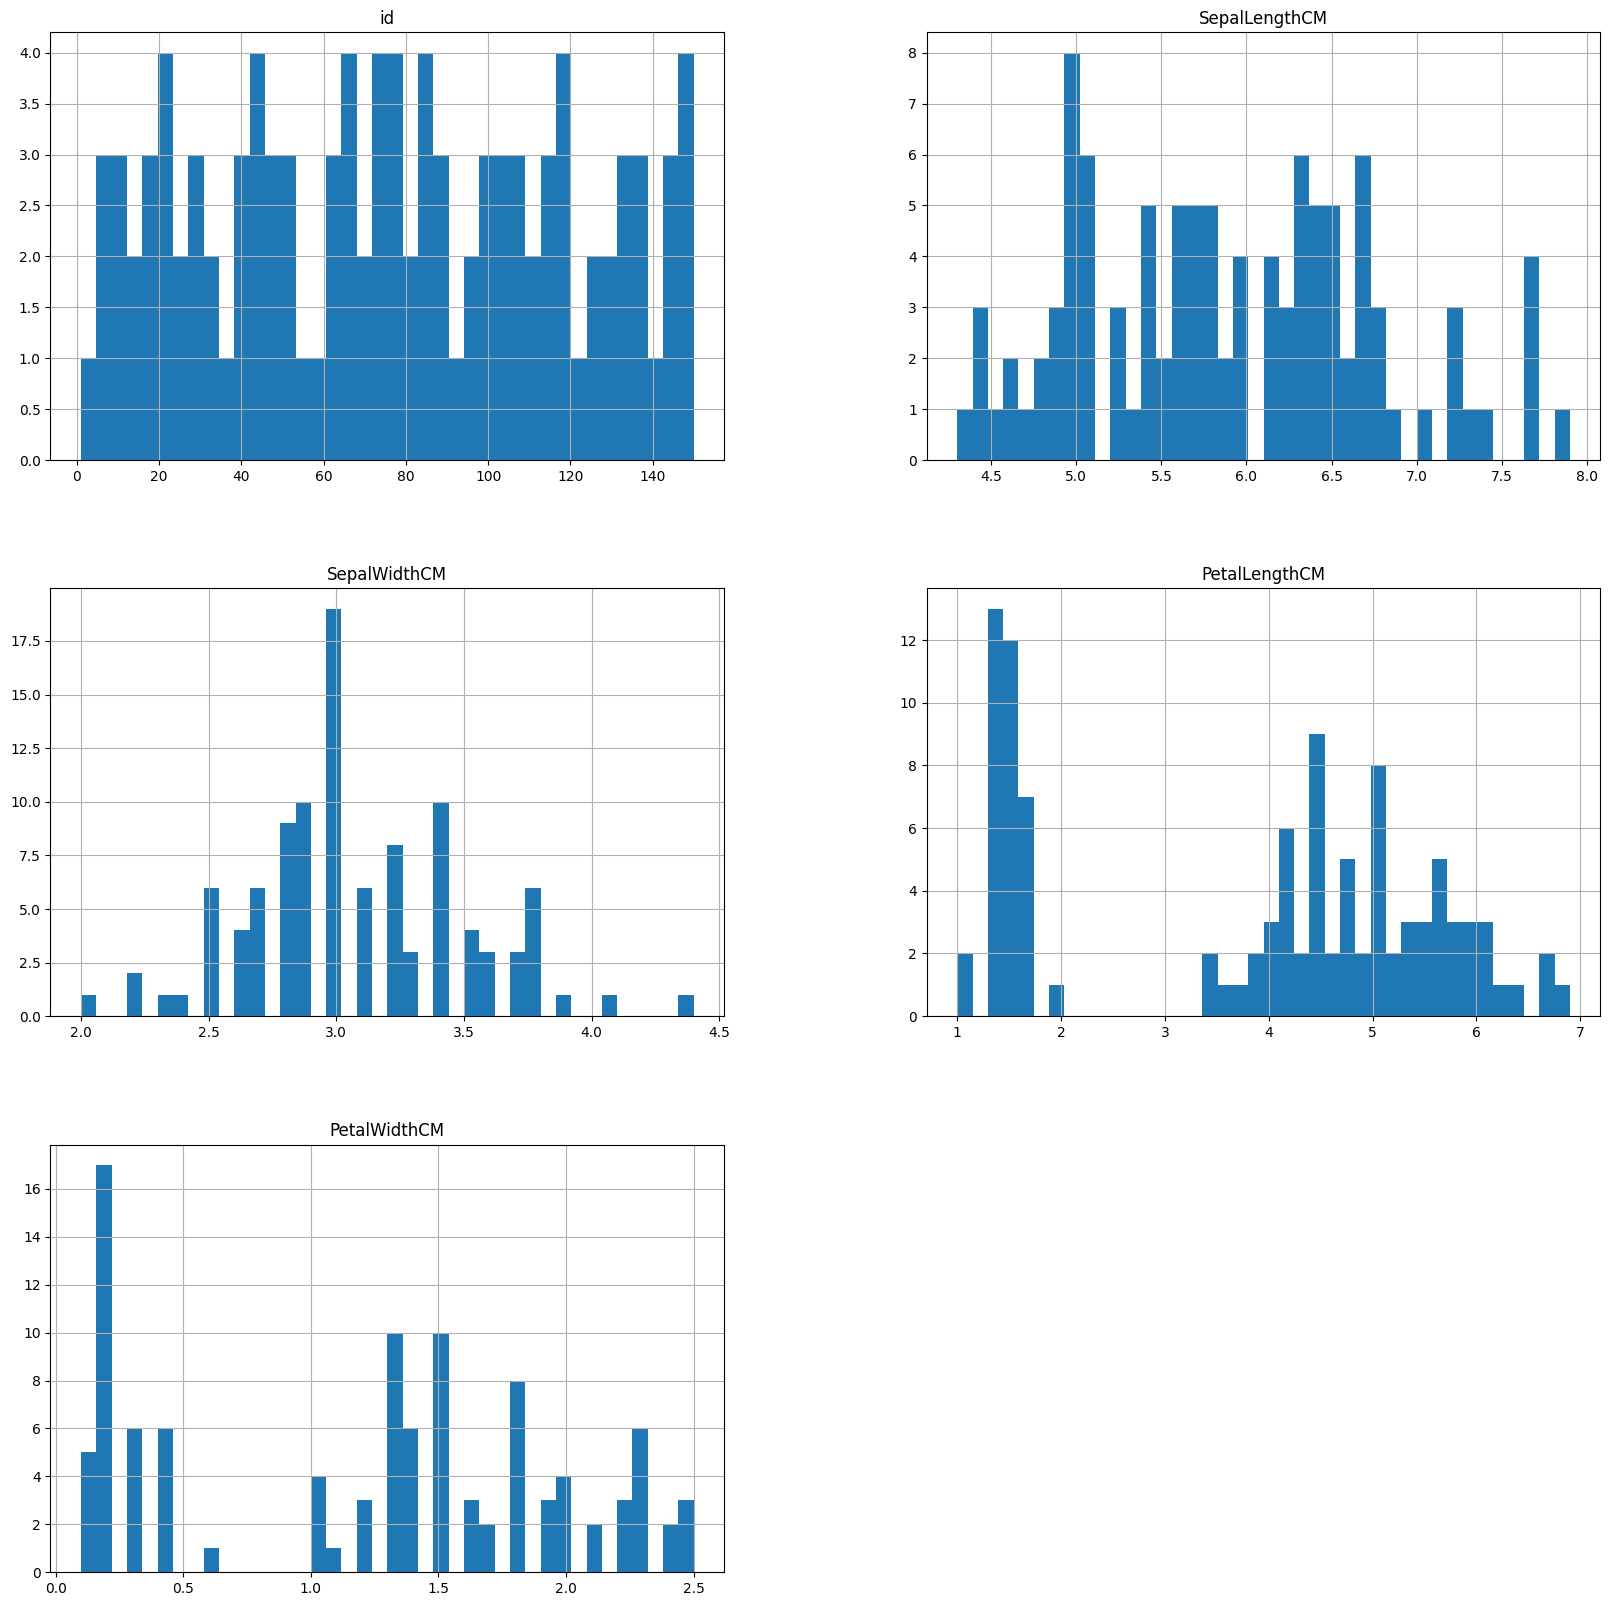

In [16]:
stratTrainDataset.hist(bins=40, figsize=(20,20))

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'SepalLengthCM'}>],
       [<Axes: title={'center': 'SepalWidthCM'}>,
        <Axes: title={'center': 'PetalLengthCM'}>],
       [<Axes: title={'center': 'PetalWidthCM'}>, <Axes: >]], dtype=object)

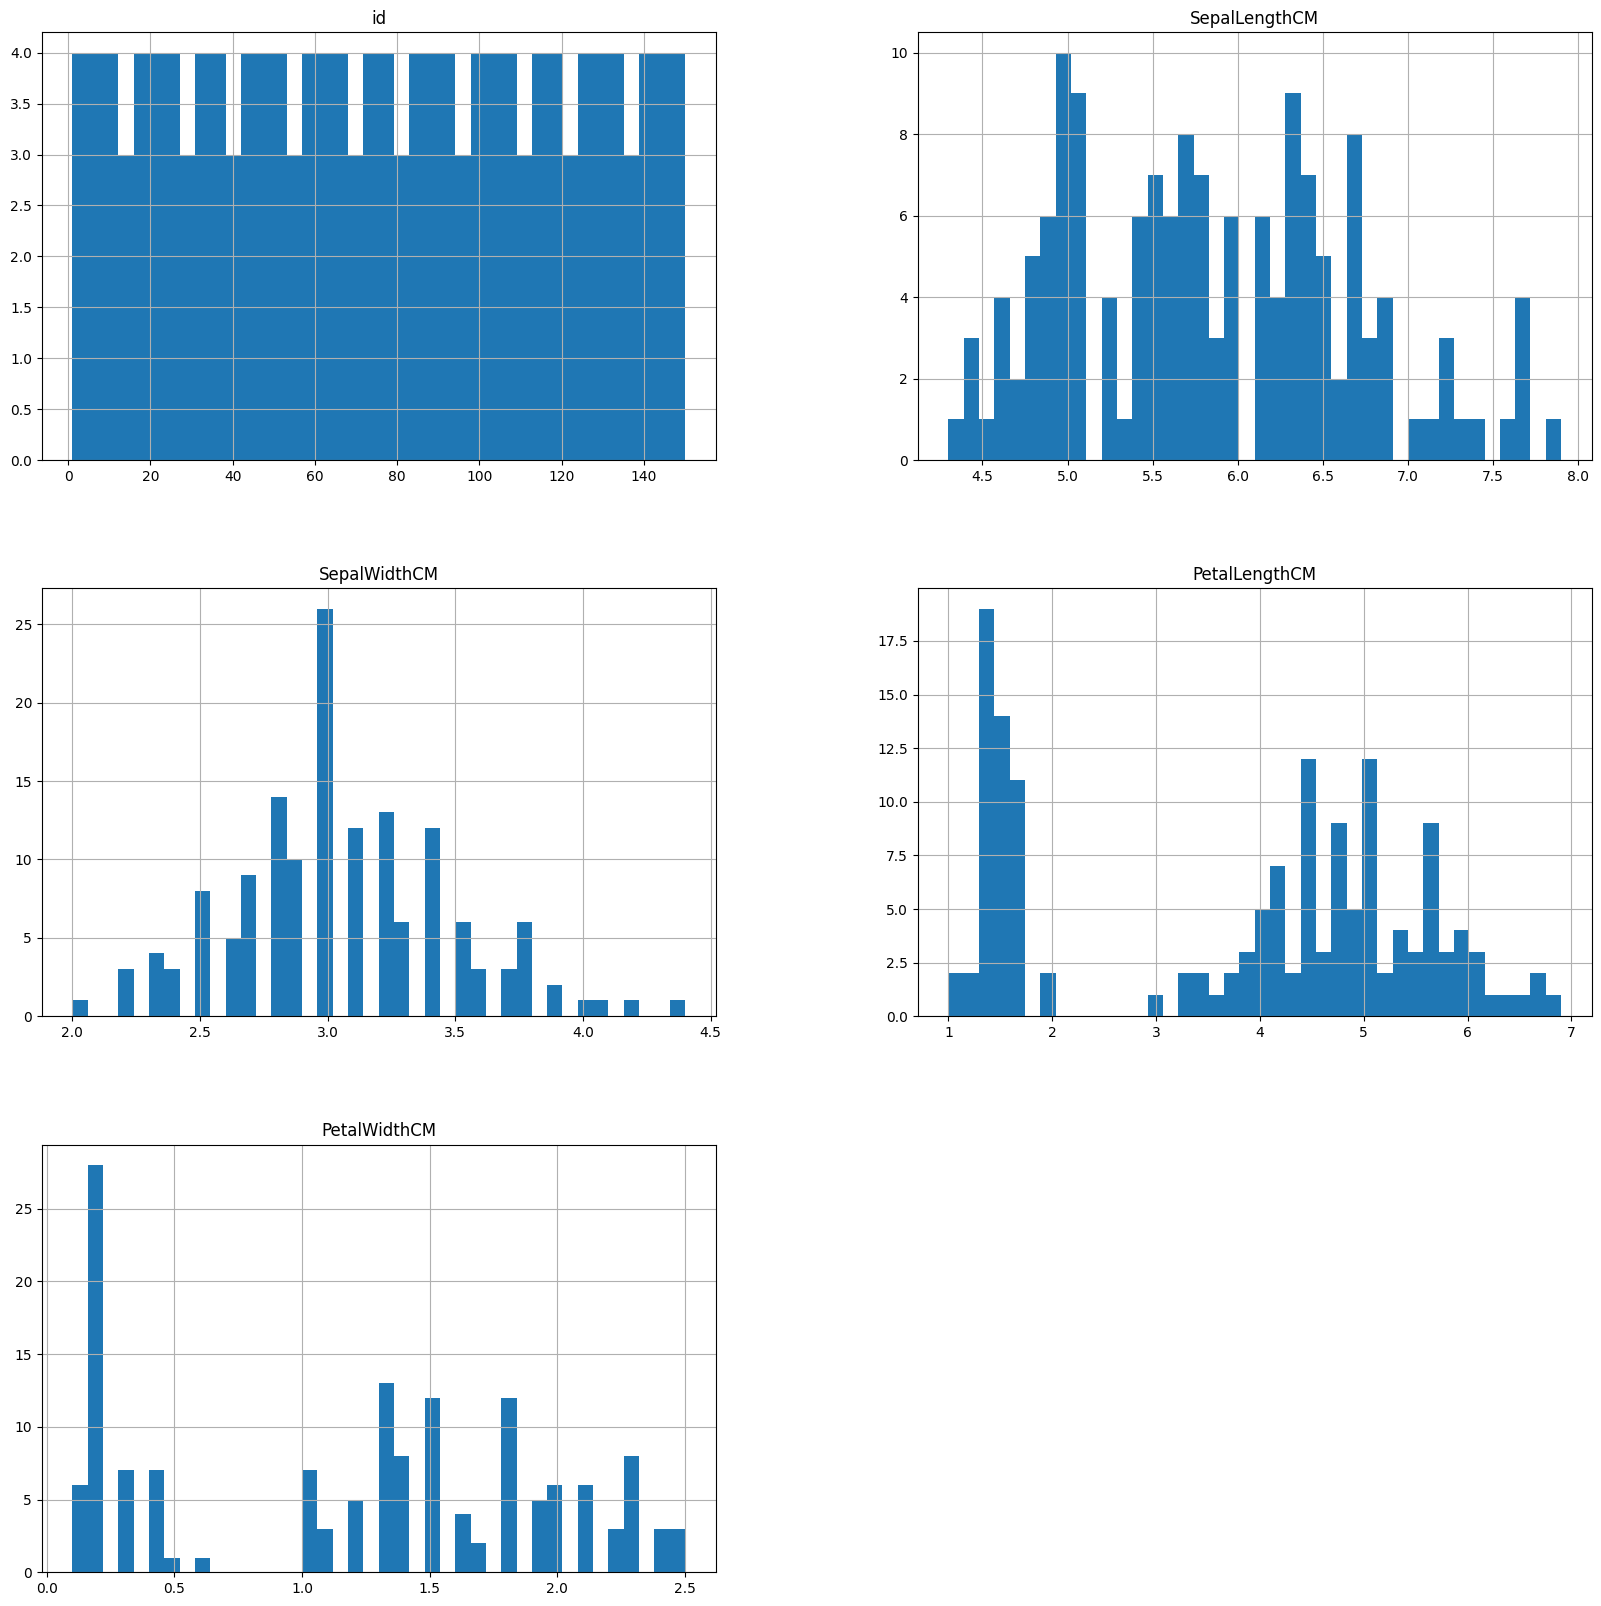

In [17]:
iris.hist(bins=40, figsize=(20,20))

#Perform stratified sampling based on "Class" using StratifiedShufflesSplit() method.

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

In [19]:
for trainIndex, testIndex in split.split(iris, iris["Class"]):
    stratTrainSet = iris.loc[trainIndex]
    stratTestSet = iris.loc[testIndex]

<Axes: >

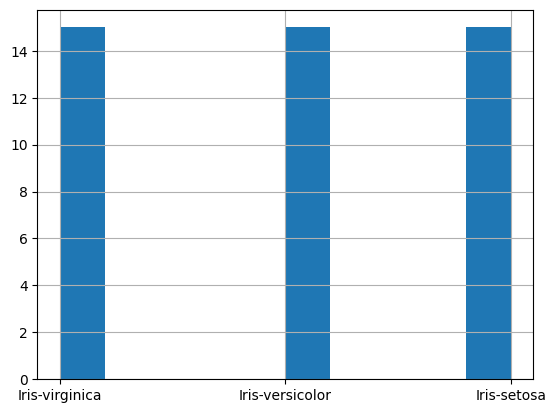

In [20]:
stratTestSet['Class'].hist()

In [21]:
stratTestSet.head(15)

,id,SepalLengthCM,SepalWidthCM,PetalLengthCM,PetalWidthCM,Class
107,108,7.3,2.9,6.3,1.8,Iris-virginica
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
133,134,6.3,2.8,5.1,1.5,Iris-virginica
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
127,128,6.1,3.0,4.9,1.8,Iris-virginica
140,141,6.7,3.1,5.6,2.4,Iris-virginica
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
20,21,5.4,3.4,1.7,0.2,Iris-setosa
141,142,6.9,3.1,5.1,2.3,Iris-virginica


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'SepalLengthCM'}>],
       [<Axes: title={'center': 'SepalWidthCM'}>,
        <Axes: title={'center': 'PetalLengthCM'}>],
       [<Axes: title={'center': 'PetalWidthCM'}>, <Axes: >]], dtype=object)

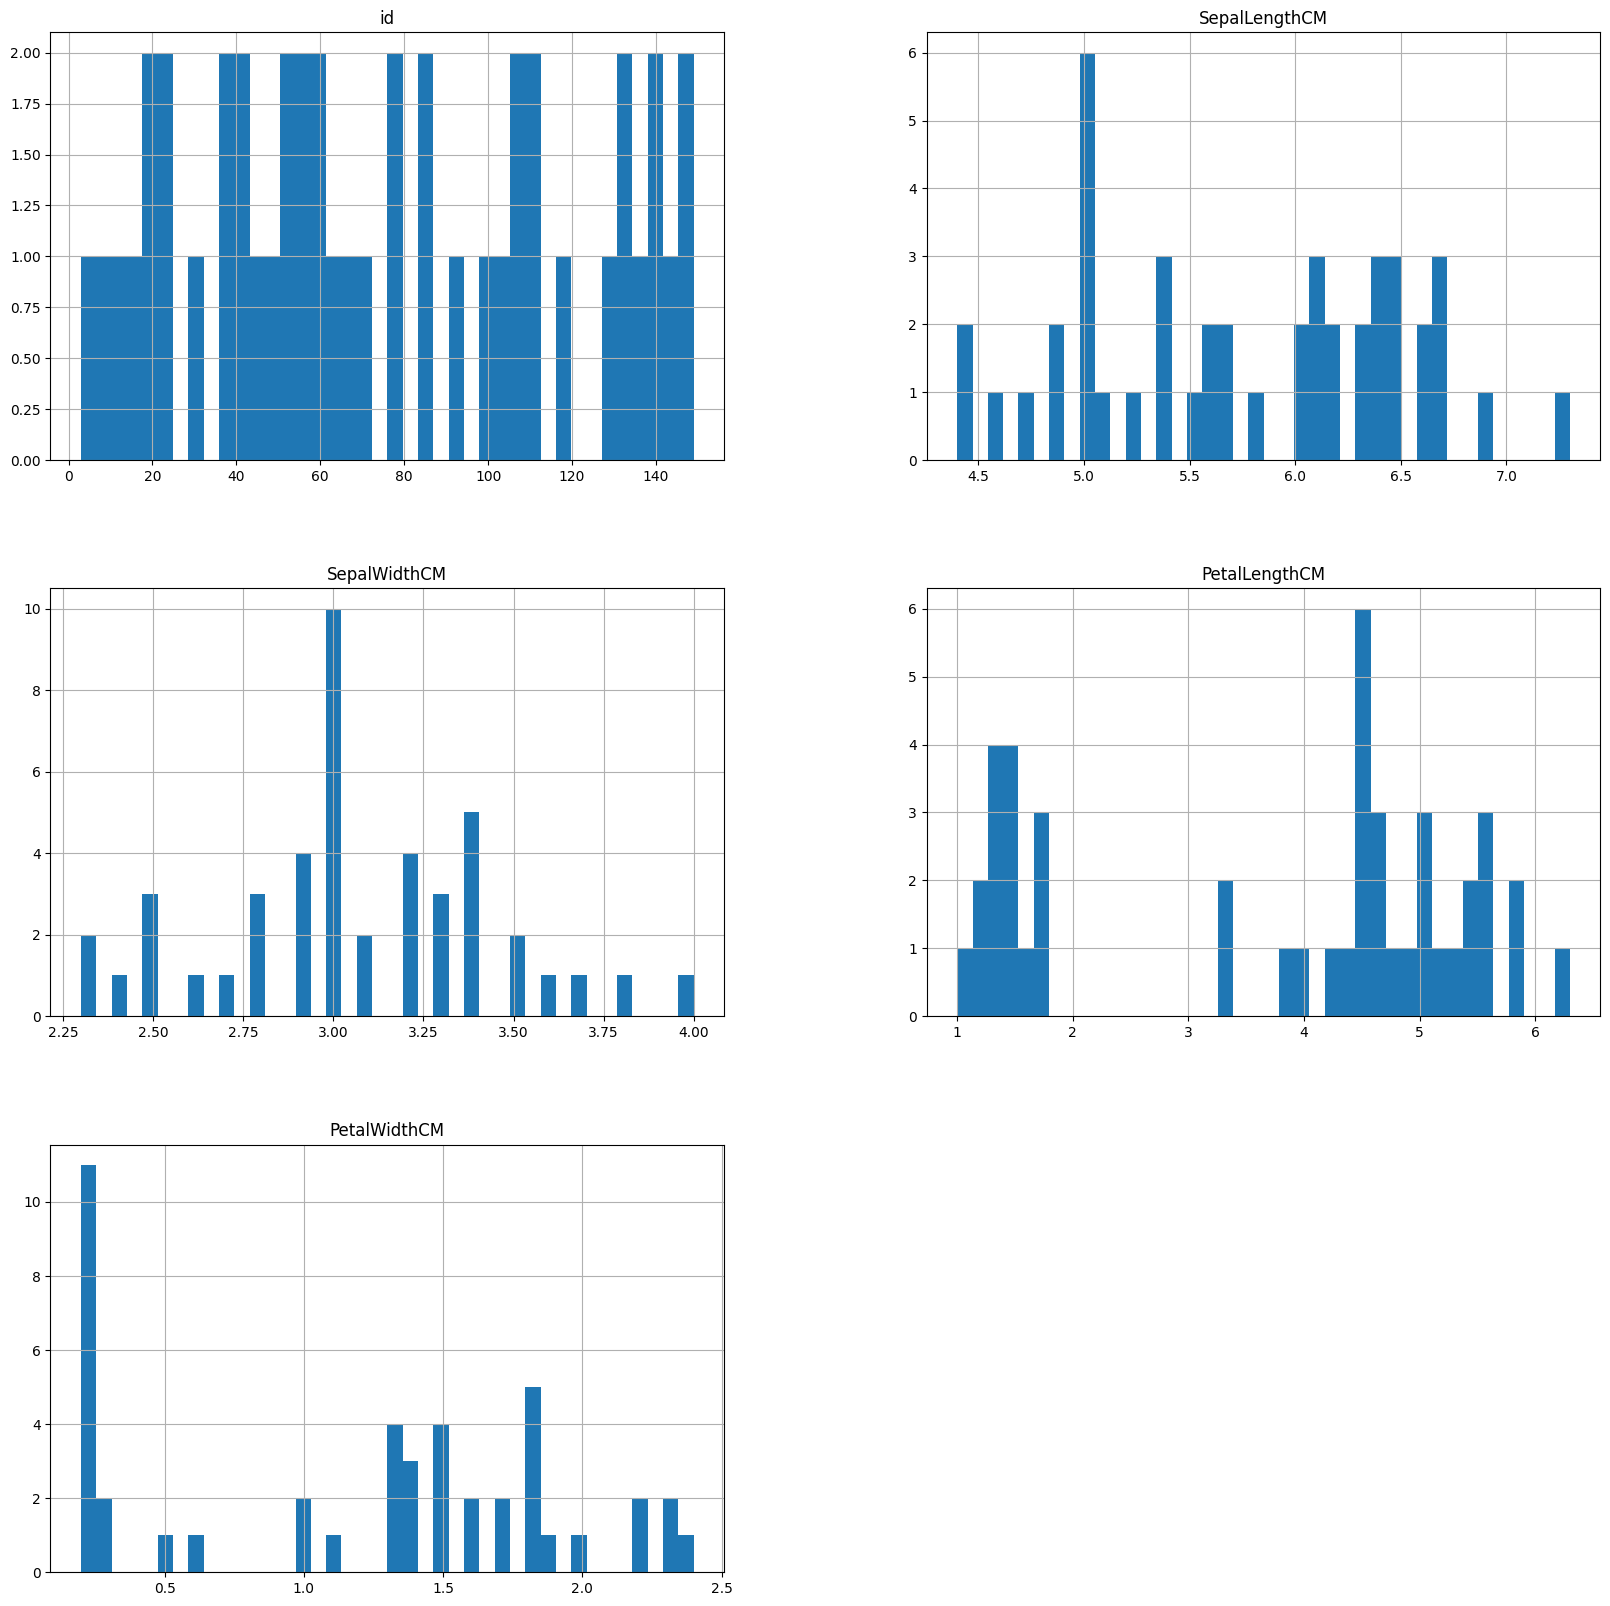

In [22]:
stratTestSet.hist(bins=40, figsize=(20,20))

In [24]:
stratTestDataset.head(15)

,id,SepalLengthCM,SepalWidthCM,PetalLengthCM,PetalWidthCM,Class
29,30,4.7,3.2,1.6,0.2,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
0,1,5.1,3.5,1.4,0.2,Iris-setosa
19,20,5.1,3.8,1.5,0.3,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa
43,44,5.0,3.5,1.6,0.6,Iris-setosa
21,22,5.1,3.7,1.5,0.4,Iris-setosa
47,48,4.6,3.2,1.4,0.2,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'SepalLengthCM'}>],
       [<Axes: title={'center': 'SepalWidthCM'}>,
        <Axes: title={'center': 'PetalLengthCM'}>],
       [<Axes: title={'center': 'PetalWidthCM'}>, <Axes: >]], dtype=object)

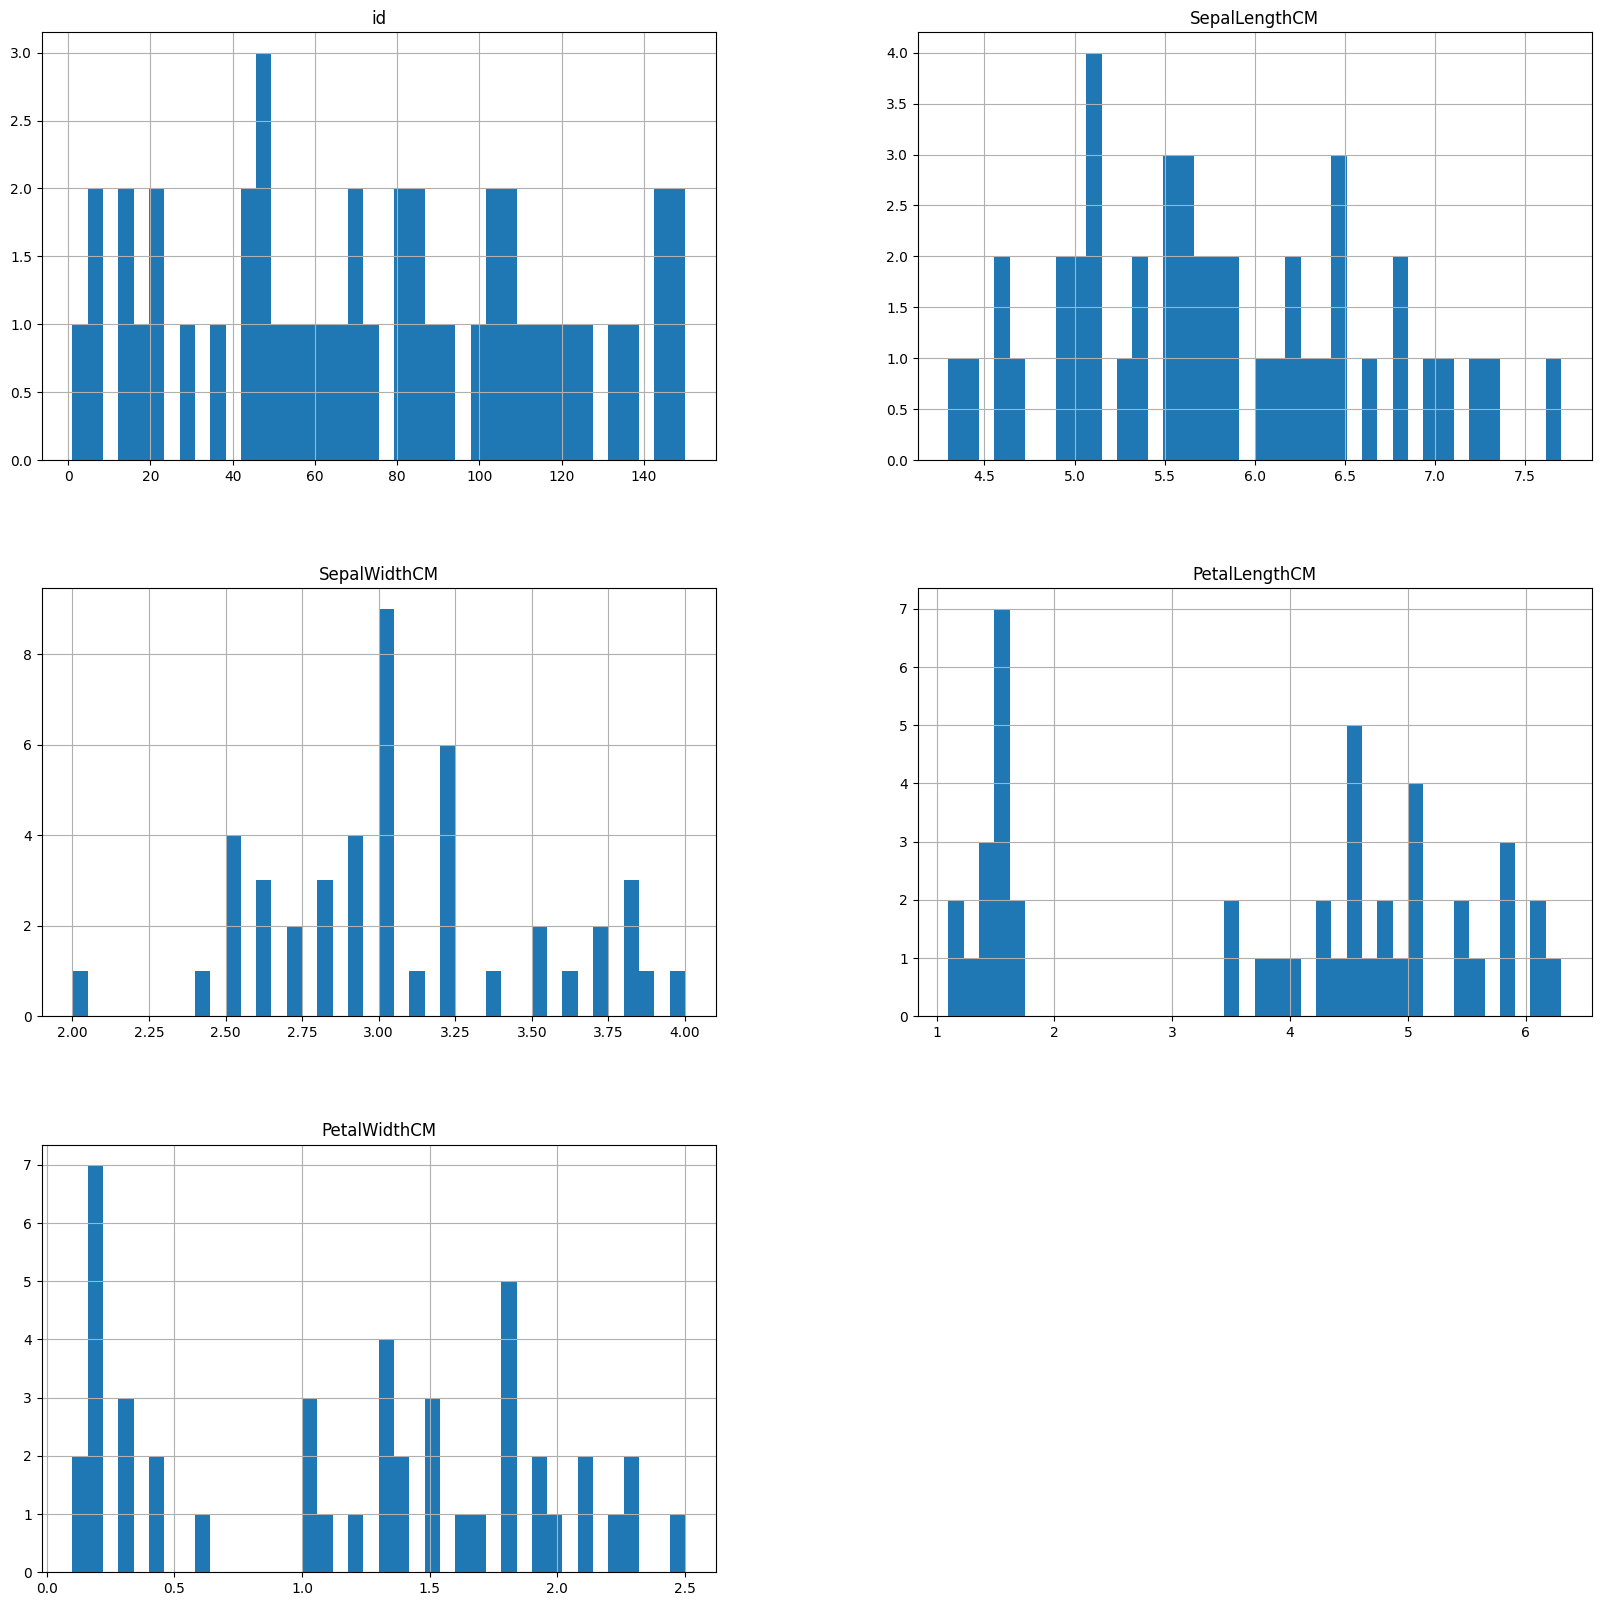

In [25]:
stratTestDataset.hist(bins=40, figsize=(20,20))

# TrainTestSplit
### Split the dataset into traint set and testing set

In [26]:
import random

In [27]:
def TrainTestSplit(data, testSize):
  if isinstance(testSize, float):
    testSize = round(testSize * len(data))

  dataIndex = data.index.tolist()
  testIndex = random.sample(population=dataIndex, k=testSize)

  testSet = data.loc[testIndex]
  trainSet = data.drop(testIndex)

  return trainSet, testSet

In [28]:
trainDataset, testDataset = TrainTestSplit(iris, testSize=0.3)

In [29]:
trainDataset.describe()

,id,SepalLengthCM,SepalWidthCM,PetalLengthCM,PetalWidthCM
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,72.800000,5.786667,3.025714,3.649524,1.152381
std,42.301437,0.817132,0.426080,1.728334,0.736297
min,2.000000,4.300000,2.000000,1.000000,0.100000
25%,37.000000,5.100000,2.800000,1.600000,0.300000
50%,71.000000,5.700000,3.000000,4.200000,1.300000
75%,106.000000,6.300000,3.300000,5.000000,1.800000
max,150.000000,7.700000,4.400000,6.900000,2.500000


In [ ]:
# Show the total number of records for each Class
print(trainDataset.groupby('Class').size())

In [31]:
testDataset.describe()

,id,SepalLengthCM,SepalWidthCM,PetalLengthCM,PetalWidthCM
count,45.000000,45.000000,45.000000,45.000000,45.000000
mean,81.800000,5.975556,3.120000,4.013333,1.306667
std,45.872154,0.847498,0.448533,1.840405,0.820864
min,1.000000,4.400000,2.200000,1.200000,0.100000
25%,46.000000,5.100000,2.800000,1.600000,0.400000
50%,83.000000,6.100000,3.100000,4.600000,1.400000
75%,121.000000,6.500000,3.300000,5.600000,2.000000
max,148.000000,7.900000,4.100000,6.700000,2.500000


In [32]:
# Show the total number of records for each Class
print(testDataset.groupby('Class').size())

Class
Iris-setosa        14
Iris-versicolor    12
Iris-virginica     19
dtype: int64
